In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_validate, KFold

### Read the input file and check the data dimension

In [2]:
df = pd.read_csv("german_credit.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
default,1000,NaN,NaN,NaN,0.3,0.458487,0,0,0,1,1
account_check_status,1000,4,no checking account,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_in_month,1000,NaN,NaN,NaN,20.903,12.0588,4,12,18,24,72
credit_history,1000,5,existing credits paid back duly till now,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,10,domestic appliances,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,1000,NaN,NaN,NaN,3271.26,2822.74,250,1365.5,2319.5,3972.25,18424
savings,1000,5,... < 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
present_emp_since,1000,5,1 <= ... < 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_as_income_perc,1000,NaN,NaN,NaN,2.973,1.11871,1,2,3,4,4
personal_status_sex,1000,4,male : single,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [6]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## Exploratory Data Analysis

### default

In [7]:
df['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

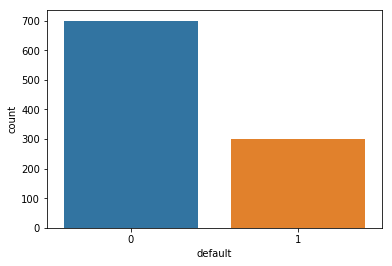

In [8]:
sns.countplot(df['default'])

##### Observation
1. There are 30% defaulters in this dataset

In [9]:
non_defaulters = df[df['default'] == 0]
defaulters = df[df['default'] == 1]

### account_check_status

In [10]:
df['account_check_status'].value_counts(normalize=True)*100

no checking account                                   39.4
< 0 DM                                                27.4
0 <= ... < 200 DM                                     26.9
>= 200 DM / salary assignments for at least 1 year     6.3
Name: account_check_status, dtype: float64

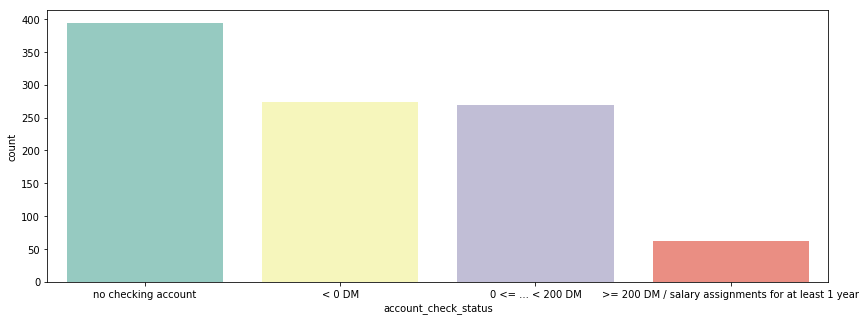

In [11]:
plt.figure(figsize=(14, 5))
sns.countplot(df['account_check_status'], 
              order=df['account_check_status'].value_counts().index.tolist(),
             palette="Set3")
# About 39% records are with account_check_status = no checking account

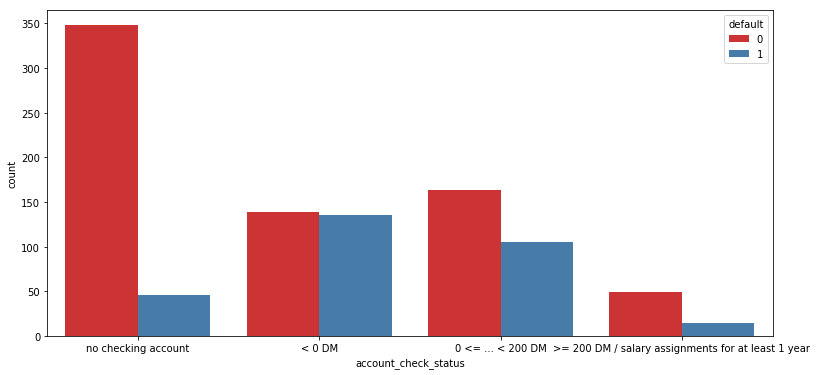

In [12]:
plt.figure(figsize=(13, 6))
sns.countplot(df['account_check_status'], 
              order=df['account_check_status'].value_counts().index.tolist(),
             palette="Set1",
             hue=df['default'])
# Maximum defaulters are having account_check_status = '< 0 DM'

### duration_in_month

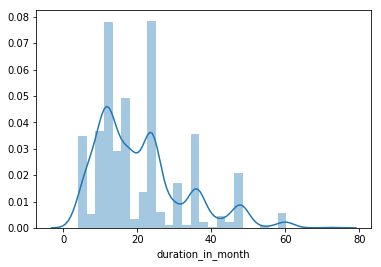

In [13]:
sns.distplot(df['duration_in_month'])

In [14]:
(pd.crosstab(index=df['default'], columns=df['duration_in_month']).T).sort_values(by=[1,0], ascending=False)
# Usually people go for 1 year (12 months), 1 and half year (18 months), 2 year (24 months), 
# 3 year (36 months) and 4 year (48 months) loans. That's the reason for those durations we see many defaulters as well.

default,0,1
duration_in_month,,
24,128,56
12,130,49
18,71,42
36,46,37
48,20,28
9,35,14
30,27,13
15,52,12
6,66,9


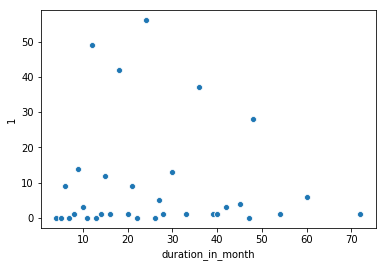

In [15]:
loan_duration_months = (pd.crosstab(index=df['default'], columns=df['duration_in_month']).T).index
no_of_defaulters = (pd.crosstab(index=df['default'], columns=df['duration_in_month']).T)[1] 
sns.scatterplot(loan_duration_months, no_of_defaulters)

# There is a weak correlation between loan duration and no of defaulters. 
# Inference: People have been defaulting irrespective of loan duration.

In [16]:
fd = pd.DataFrame()
fd['ld'] = loan_duration_months
fd['nd'] = no_of_defaulters.values
fd.corr()

,ld,nd
ld,1.000000,-0.044153
nd,-0.044153,1.000000


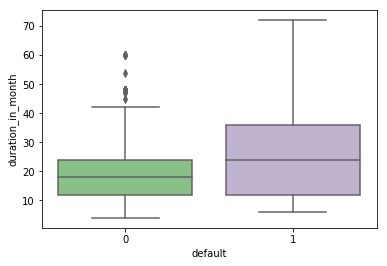

In [17]:
sns.boxplot('default', 'duration_in_month', data=df, palette='Accent')
# Defaulters generally have higher duration_in_month than non-defaulters

### credit_history

existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: credit_history, dtype: float64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

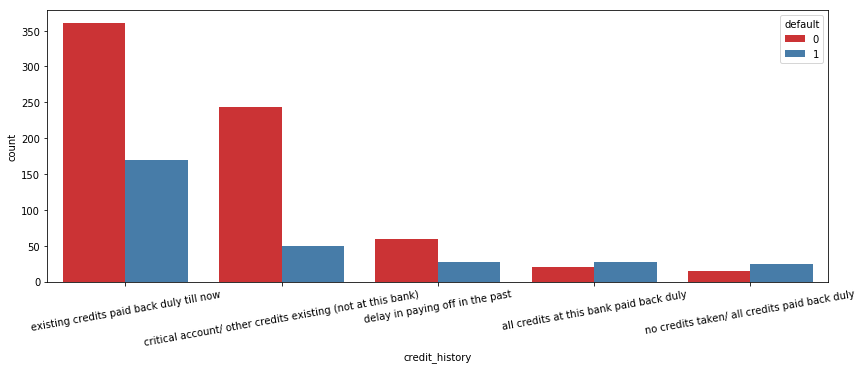

In [18]:
plt.figure(figsize=(14, 5))
print(df['credit_history'].value_counts(normalize=True)*100)
sns.countplot('credit_history', data=df, hue='default', palette='Set1', 
              order=df['credit_history'].value_counts().index.tolist())
plt.xticks(rotation=10)
# Surprisingly people who have 'existing credits paid back duly till now' have maximum defaulters (53%)
# Second set of defaulters come from the more obvious group 'critical account/ other credits existing (not at this bank)'

### purpose

domestic appliances             28.0
car (new)                       23.4
radio/television                18.1
car (used)                      10.3
business                         9.7
(vacation - does not exist?)     5.0
education                        2.2
repairs                          1.2
furniture/equipment              1.2
retraining                       0.9
Name: purpose, dtype: float64


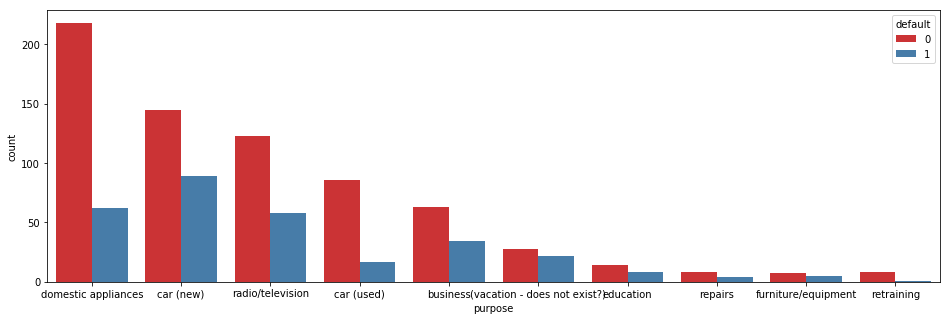

In [19]:
plt.figure(figsize=(16, 5))
print(df['purpose'].value_counts(normalize=True)*100)
sns.countplot('purpose', data=df, hue='default', palette='Set1', 
              order=df['purpose'].value_counts().index.tolist())
# Seems like a lot of people (28%) are taking loan for domestic appliances, followed by new car (23%)
# And yes about 18% people are taking loan for radio/television too.

# The group that takes loan for new car is more vulnerable to default, followed by domestic appliances 
# and radio/television groups

In [20]:
pd.crosstab(index=df['default'], columns=df['purpose']).T.sort_values(by=[1,0], ascending=False)

default,0,1
purpose,,
car (new),145,89
domestic appliances,218,62
radio/television,123,58
business,63,34
(vacation - does not exist?),28,22
car (used),86,17
education,14,8
furniture/equipment,7,5
repairs,8,4


### credit_amount

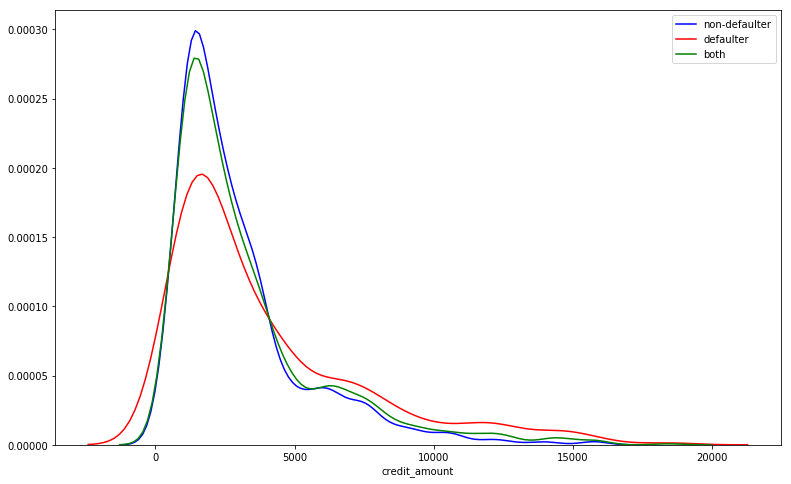

In [21]:
plt.figure(figsize=(13,8))
ax=sns.distplot( non_defaulters['credit_amount'], hist=False, color='b', label='non-defaulter')
ax=sns.distplot( defaulters['credit_amount'], hist=False, color='r', label='defaulter')
ax=sns.distplot( df['credit_amount'], hist=False, color='g', label='both')
plt.legend(loc='upper right')
plt.show()

In [22]:
non_defaulters['credit_amount'].skew(), defaulters['credit_amount'].skew(), df['credit_amount'].skew()

(1.9503662869463296, 1.5839579862445616, 1.9496276798326209)

In [23]:
non_defaulters['credit_amount'].kurtosis(), defaulters['credit_amount'].kurtosis(), df['credit_amount'].kurtosis()

(4.685748469017579, 2.1416514761787373, 4.29259030804851)

In [24]:
df.pivot_table(index='default',  values=['credit_amount'], aggfunc=['mean', 'median', 'min', 'max'])
# Defaulters generally have higher credit_amount than non_defaulters

,mean,median,min,max
,credit_amount,credit_amount,credit_amount,credit_amount
default,,,,
0,2985.457143,2244.0,250,15857
1,3938.126667,2574.5,433,18424


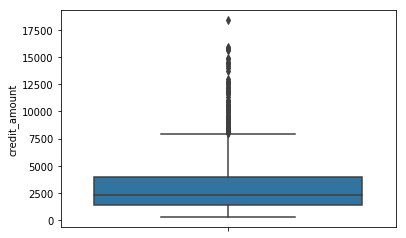

In [25]:
sns.boxplot('credit_amount', data=df, orient='v')
# Seems like there are so many outliers in credit_amount. They should be examined separately.

In [26]:
df_credit_outliers = df[df['credit_amount'] > 7500]

In [27]:
df_credit_outliers['personal_status_sex'].value_counts(normalize=True)*100
# Well, 66% of those outliers belong to single male followed by 25% to divorced/separated/married female

male : single                          66.279070
female : divorced/separated/married    25.581395
male : divorced/separated               6.976744
male : married/widowed                  1.162791
Name: personal_status_sex, dtype: float64

In [28]:
pd.crosstab(index=df_credit_outliers['personal_status_sex'], 
            columns=[df_credit_outliers['job'], df_credit_outliers['present_res_since']])

job                                 management/ self-employed/ highly qualified employee/ officer  \
present_res_since                                                                               1   
personal_status_sex                                                                                 
female : divorced/separated/married                                                  0              
male : divorced/separated                                                            0              
male : married/widowed                                                               0              
male : single                                                                        2              

job                                           skilled employee / official     \
present_res_since                    2  3   4                           1  2   
personal_status_sex                                                            
female : divorced/separated/married  4  0   4                           1  7   
male : divorced/separated            1  1   1                           1  0   
male : married/widowed               0  0   1                           0  0   
male : single                        8  3  11                           2  9   

job                                         \
present_res_since                    3   4   
personal_status_sex                          
female : divorced/separated/married  0   4   
male : divorced/separated            0   1   
male : married/widowed               0   0   
male : single                        4  14   

job                                 unemployed/ unskilled - non-resident  \
present_res_since                                                      2   
personal_status_sex                                                        
female : divorced/separated/married                                    0   
male : divorced/separated                                              0   
male : married/widowed                                                 0   
male : single                                                          1   

job                                 unskilled - resident           
present_res_since                                      1  2  3  4  
personal_status_sex                                                
female : divorced/separated/married                    1  0  0  1  
male : divorced/separated                              1  0  0  0  
male : married/widowed                                 0  0  0  0  
male : single                                          0  1  1  1

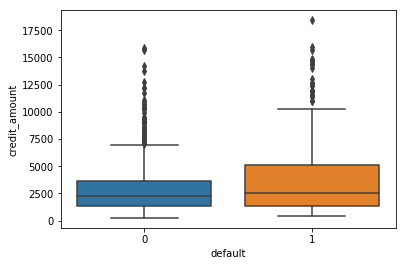

In [29]:
sns.boxplot('default', 'credit_amount', data=df)
# Defaulters generally have higher credit_amount than non-defaulters

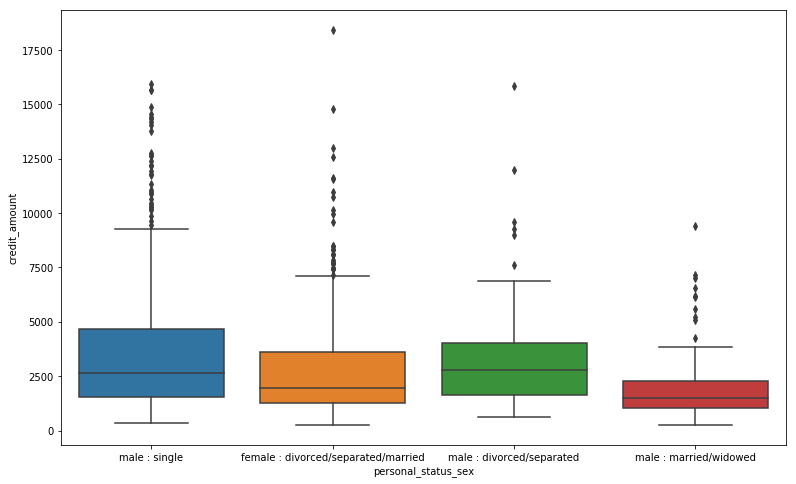

In [30]:
plt.figure(figsize=(13,8))
sns.boxplot('personal_status_sex', 'credit_amount', data=df)

# married/widowed men have lesser credit_amount as compared to single/divorced/separated men
# Women have higher credit though lesser than single/divorced/separated men but higher than married/widowed men

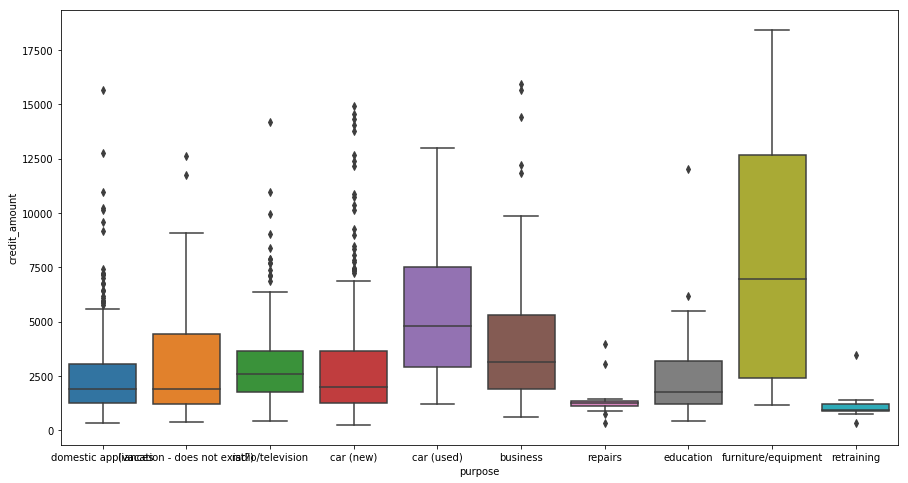

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot('purpose', 'credit_amount', data=df)
# People who take loan for furniture have a wide range of credit_amount

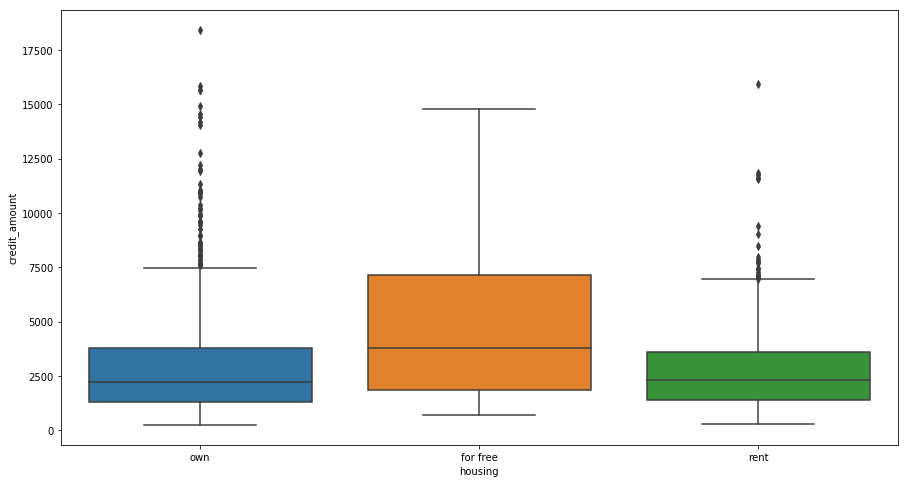

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot('housing', 'credit_amount', data=df)
# People who stay 'for free' generally have higher credit amount

In [33]:
# Let's see who generally stay for free
df_free_housing = df[df['housing'] == 'for free']

In [34]:
df_free_housing['personal_status_sex'].value_counts(normalize=True)*100
# single male.. Isn't it obvious :) 

male : single                          78.703704
female : divorced/separated/married    17.592593
male : divorced/separated               2.777778
male : married/widowed                  0.925926
Name: personal_status_sex, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

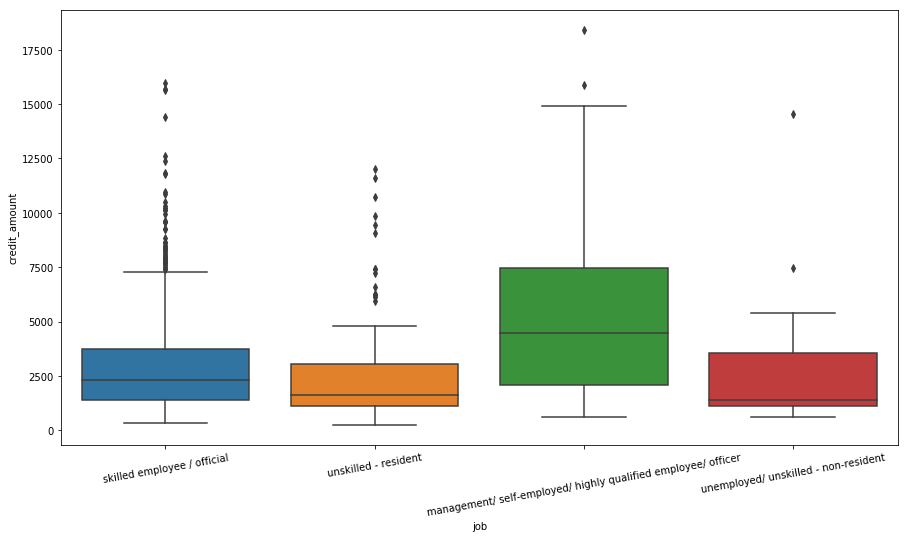

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot('job', 'credit_amount', data=df)
plt.xticks(rotation=10)
# Well people with job in management/self employed/highly qualified employee/officer have pretty high median value
# for credit_amount. Also they have a quite bigger range (IQR).

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

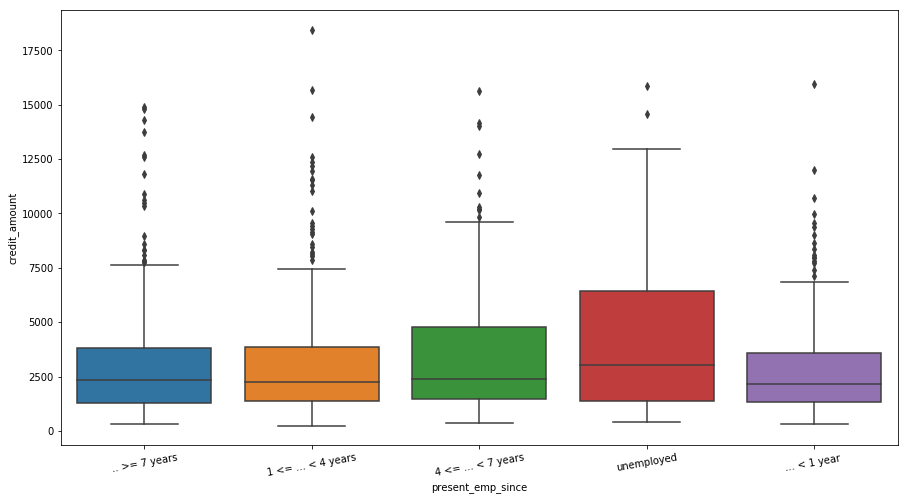

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot('present_emp_since', 'credit_amount', data=df)
plt.xticks(rotation=10)

### savings

In [37]:
df['savings'].value_counts()

... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: savings, dtype: int64

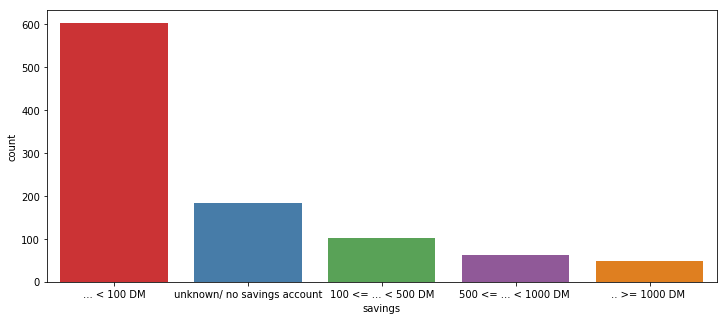

In [38]:
plt.figure(figsize=(12, 5))
sns.countplot(df['savings'], 
              order=df['savings'].value_counts().index.tolist(),
             palette="Set1")

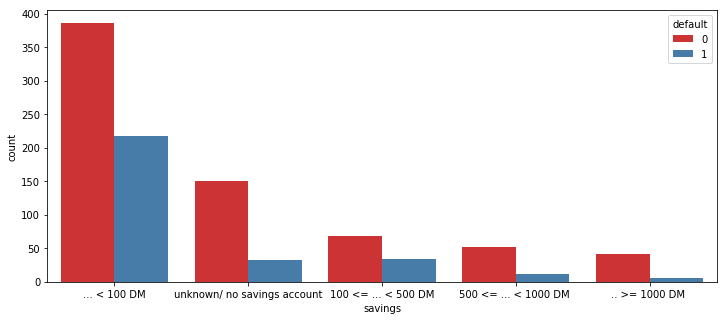

In [39]:
plt.figure(figsize=(12, 5))
sns.countplot(df['savings'], 
              order=df['savings'].value_counts().index.tolist(),
             palette="Set1",
             hue=df['default'])

### present_emp_since

In [40]:
df['present_emp_since'].value_counts(normalize=True)*100

1 <= ... < 4 years    33.9
.. >= 7 years         25.3
4 <= ... < 7 years    17.4
... < 1 year          17.2
unemployed             6.2
Name: present_emp_since, dtype: float64

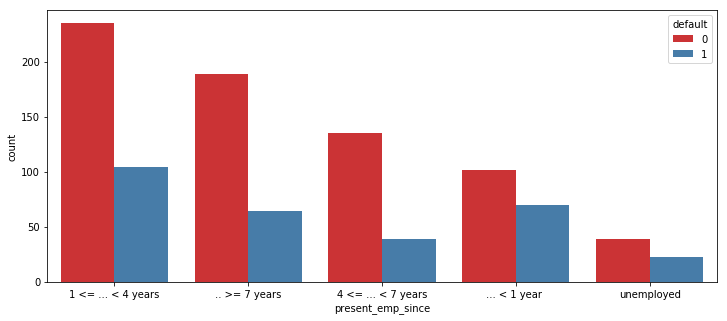

In [41]:
plt.figure(figsize=(12, 5))
sns.countplot(df['present_emp_since'], 
              order=df['present_emp_since'].value_counts().index.tolist(),
             palette="Set1",
             hue=df['default'])

### installment_as_income_perc

In [42]:
df['installment_as_income_perc']

0      4
1      2
2      2
3      2
4      3
5      2
6      3
7      2
8      2
9      4
10     3
11     3
12     1
13     4
14     2
15     4
16     4
17     2
18     4
19     3
20     4
21     2
22     1
23     3
24     2
25     1
26     4
27     3
28     3
29     3
      ..
970    4
971    1
972    1
973    4
974    4
975    3
976    2
977    4
978    4
979    2
980    2
981    3
982    1
983    2
984    2
985    4
986    2
987    2
988    4
989    4
990    2
991    4
992    2
993    4
994    4
995    3
996    4
997    4
998    4
999    3
Name: installment_as_income_perc, Length: 1000, dtype: int64

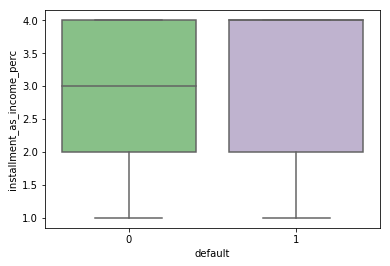

In [43]:
sns.boxplot('default', 'installment_as_income_perc', data=df, palette='Accent')

### personal_status_sex

In [44]:
df['personal_status_sex'].value_counts(normalize=True)*100

male : single                          54.8
female : divorced/separated/married    31.0
male : married/widowed                  9.2
male : divorced/separated               5.0
Name: personal_status_sex, dtype: float64

In [45]:
pd.crosstab(index=df['personal_status_sex'], columns=df['default'])

default,0,1
personal_status_sex,,
female : divorced/separated/married,201,109
male : divorced/separated,30,20
male : married/widowed,67,25
male : single,402,146


In [46]:
pd.crosstab(index=df['personal_status_sex'], columns=df['purpose'])

purpose,(vacation - does not exist?),business,car (new),car (used),domestic appliances,education,furniture/equipment,radio/television,repairs,retraining
personal_status_sex,,,,,,,,,,
female : divorced/separated/married,21,19,70,24,85,5,3,74,6,3
male : divorced/separated,1,10,10,3,7,2,1,15,1,0
male : married/widowed,1,9,20,6,42,3,0,7,1,3
male : single,27,59,134,70,146,12,8,85,4,3


In [47]:
pd.crosstab(index=df['personal_status_sex'], columns=df['property'])

property,if not A121 : building society savings agreement/ life insurance,"if not A121/A122 : car or other, not in attribute 6",real estate,unknown / no property
personal_status_sex,,,,
female : divorced/separated/married,79,109,89,33
male : divorced/separated,10,18,17,5
male : married/widowed,19,28,43,2
male : single,124,177,133,114


In [48]:
pd.crosstab(index=df['personal_status_sex'], columns=df['housing'])

housing,for free,own,rent
personal_status_sex,,,
female : divorced/separated/married,19,196,95
male : divorced/separated,3,41,6
male : married/widowed,1,68,23
male : single,85,408,55


In [49]:
pd.crosstab(index=df['personal_status_sex'], columns=df['credits_this_bank'])

credits_this_bank,1,2,3,4
personal_status_sex,,,,
female : divorced/separated/married,217,87,4,2
male : divorced/separated,33,17,0,0
male : married/widowed,63,26,3,0
male : single,320,203,21,4


In [50]:
pd.crosstab(index=df['personal_status_sex'], columns=df['job'])

job,management/ self-employed/ highly qualified employee/ officer,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident
personal_status_sex,,,,
female : divorced/separated/married,37,197,12,64
male : divorced/separated,11,31,0,8
male : married/widowed,6,62,2,22
male : single,94,340,8,106


In [51]:
pd.crosstab(index=df['personal_status_sex'], columns=df['people_under_maintenance'])

people_under_maintenance,1,2
personal_status_sex,,
female : divorced/separated/married,296,14
male : divorced/separated,47,3
male : married/widowed,90,2
male : single,412,136


In [52]:
pd.crosstab(index=df['personal_status_sex'], columns=df['foreign_worker'])

foreign_worker,no,yes
personal_status_sex,,
female : divorced/separated/married,7,303
male : divorced/separated,1,49
male : married/widowed,6,86
male : single,23,525


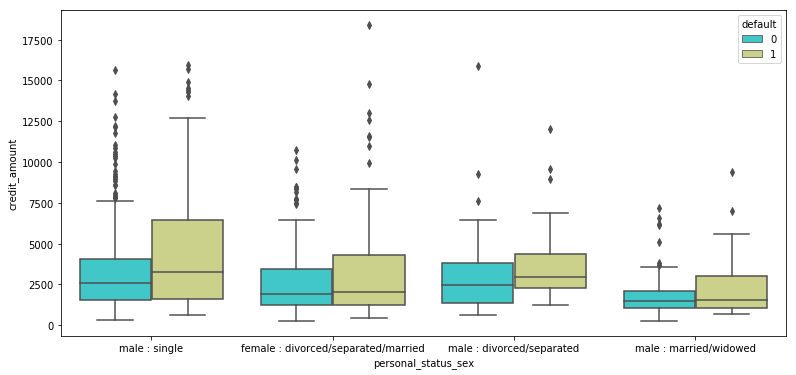

In [53]:
plt.figure(figsize=(13, 6))
sns.boxplot('personal_status_sex', 'credit_amount', hue='default', data=df, palette='rainbow')

### other_debtors

In [54]:
df['other_debtors'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

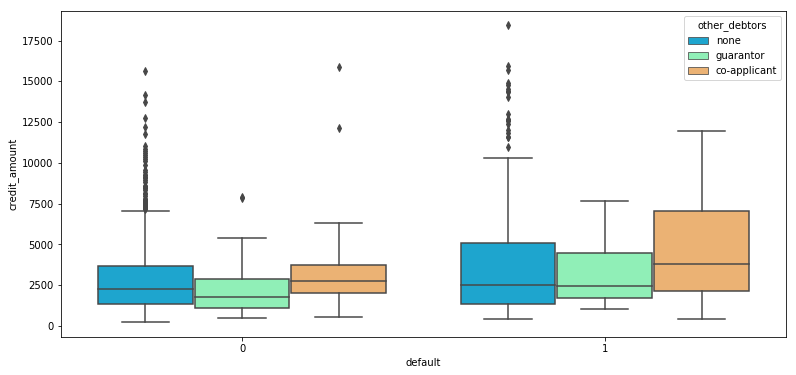

In [55]:
plt.figure(figsize=(13, 6))
sns.boxplot('default', 'credit_amount', hue='other_debtors', data=df, palette='rainbow')

In [56]:
pd.crosstab(index=df['default'], columns=df['other_debtors'])

other_debtors,co-applicant,guarantor,none
default,,,
0,23,42,635
1,18,10,272


### property

In [57]:
df['property'].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

### age

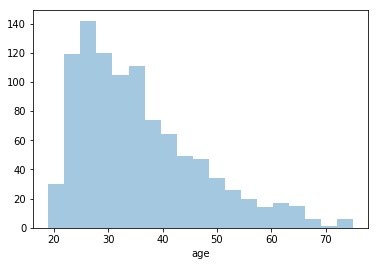

In [58]:
sns.distplot(df['age'], kde=False)

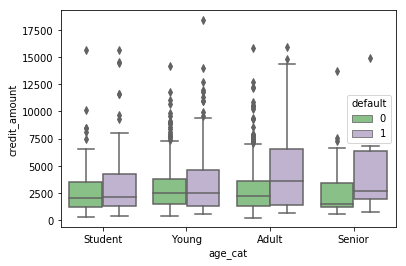

In [59]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["age_cat"] = pd.cut(df['age'], interval, labels=cats)

sns.boxplot('age_cat', 'credit_amount', hue='default', data=df, palette='Accent')


In [60]:
# Drop the extra column created for EDA
df = df.drop(['age_cat'], axis=1)

### job

In [61]:
# Let's see which jobs are popular
df['job'].value_counts(normalize=True)*100

skilled employee / official                                      63.0
unskilled - resident                                             20.0
management/ self-employed/ highly qualified employee/ officer    14.8
unemployed/ unskilled - non-resident                              2.2
Name: job, dtype: float64

In [62]:
pd.crosstab(df['job'], columns=df['default']).sort_values(by=1, ascending=False)
# skilled employee/official default the most

default,0,1
job,,
skilled employee / official,444,186
unskilled - resident,144,56
management/ self-employed/ highly qualified employee/ officer,97,51
unemployed/ unskilled - non-resident,15,7


## Common Functions

In [63]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

In [64]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [65]:
def model_scores(model_name, y_test, y_pred):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name] = [accuracy_score(y_test, y_pred), 
                         recall_score(y_test, y_pred),
                         precision_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]
    return result

In [66]:
def model_scores_cross_validation(model_name, d, verbose=False):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name + ' (Mean Score) '] = [d['test_accuracy'].mean(), 
                          d['test_recall'].mean(),
                          d['test_precision'].mean(),
                          d['test_f1'].mean()]
    result[model_name + ' (Std Deviation)'] = [d['test_accuracy'].std(), 
                          d['test_recall'].std(),
                          d['test_precision'].std(),
                          d['test_f1'].std()]
    
    if (verbose == True):
        print("Accouracy : ", d['test_accuracy'])
        print("Recall    : ", d['test_recall'])
        print("Precision : ", d['test_precision'])
        print("F1        : ", d['test_f1'])
    
    return result

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = pd.get_dummies(data=df.iloc[:,1:], drop_first=True)
X.head()
y = df['default']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [70]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [71]:
# Done above

### Check for highly correlated variables but don't required any treatment for this use case

In [72]:
corr_threshold = 0.1
X.corr()[(X.corr() > corr_threshold) | (X.corr() < (-1 * corr_threshold))]

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
duration_in_month,1.000000,0.624984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.212838,NaN,NaN,NaN,NaN,NaN,NaN,-0.181203,0.164718,0.138196
credit_amount,0.624984,1.000000,-0.271316,NaN,NaN,NaN,NaN,NaN,-0.100510,NaN,...,0.248922,NaN,NaN,-0.117497,NaN,NaN,NaN,-0.161757,0.276995,NaN
installment_as_income_perc,NaN,-0.271316,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
present_res_since,NaN,NaN,NaN,1.000000,0.266419,NaN,NaN,NaN,NaN,NaN,...,0.188028,NaN,NaN,-0.297547,0.167285,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,0.266419,1.000000,0.149254,0.118201,NaN,NaN,NaN,...,0.206368,NaN,NaN,NaN,-0.212620,-0.148283,NaN,NaN,0.145259,NaN
credits_this_bank,NaN,NaN,NaN,NaN,0.149254,1.000000,0.109667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_under_maintenance,NaN,NaN,NaN,NaN,0.118201,0.109667,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.106737,NaN,0.145066,NaN,NaN
account_check_status_< 0 DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.159297,-0.495358,...,NaN,NaN,NaN,-0.125705,NaN,NaN,NaN,NaN,NaN,NaN
account_check_status_>= 200 DM / salary assignments for at least 1 year,NaN,-0.100510,NaN,NaN,NaN,NaN,NaN,-0.159297,1.000000,-0.209080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_check_status_no checking account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.495358,-0.209080,1.000000,...,NaN,NaN,NaN,0.104407,NaN,NaN,NaN,NaN,NaN,NaN


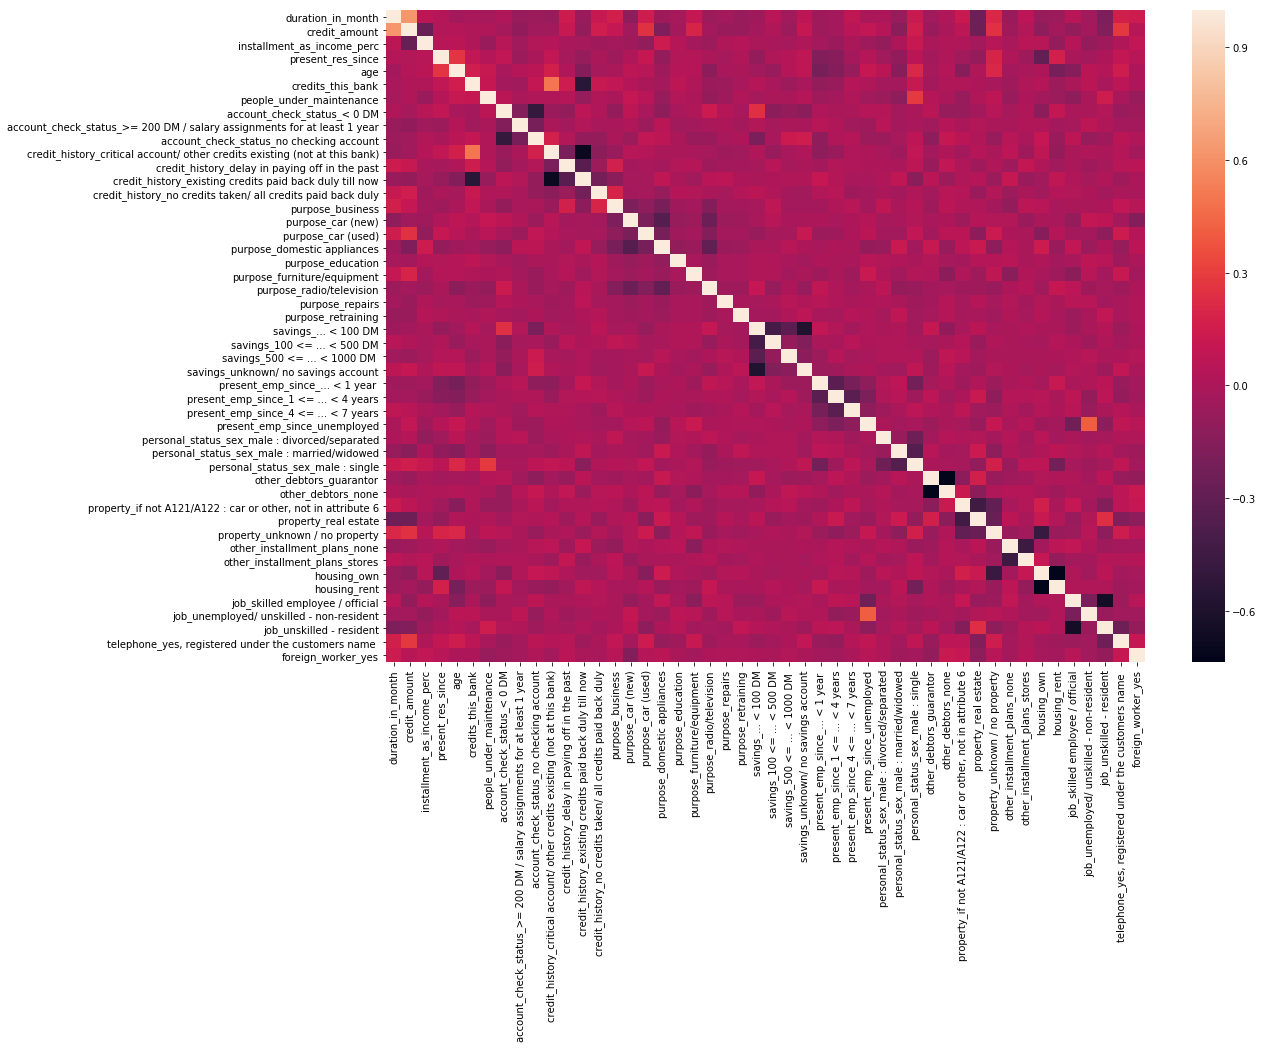

In [73]:
plt.figure(figsize=(17, 12))
sns.heatmap(X.corr(), annot=False)

### Drop the original variables which are converted to dummy

In [74]:
# Doesn't need to do anything. This is illustrated with a simple example below. 
# When we create dummies for a Categorical variable (using pd.get_dummies(...) method), the Categorical variable is no longer 
# part of dataset.
# As can be seen below, after creating dummies for Categorical variable B, column B is no longer part of dataset.
dfo = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})

In [75]:
pd.get_dummies(dfo, drop_first=True)

,C,A_b,B_b,B_c
0,1,0,1,0
1,2,1,0,0
2,3,0,0,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [76]:
# As informed by Garima, this split is not needed. She mentioned that entire analysis should be done 
# with above split only.

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [77]:
#class_weights = get_class_weights(y_train)
model = RandomForestClassifier(n_estimators=500,
                               criterion = 'entropy', 
                               n_jobs = 2, 
                               random_state = 9999)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [78]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [79]:
y_train_predict = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

In [80]:
model_scores("RF_Train", y_train, y_train_predict)

,RF_Train
Accuracy,1.0
Recall,1.0
Precision,1.0
F1 Score,1.0


In [81]:
confusion_matrix(y_train, y_train_predict)

array([[347,   0],
       [  0, 153]], dtype=int64)

In [82]:
y_test_predict = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

In [83]:
model_scores("RF_Test", y_test, y_test_predict)

,RF_Test
Accuracy,0.766000
Recall,0.374150
Precision,0.687500
F1 Score,0.484581


In [84]:
confusion_matrix(y_test, y_test_predict)

array([[328,  25],
       [ 92,  55]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [85]:
pd.DataFrame(index=X.columns, data=model.feature_importances_*100).sort_values(by=0, ascending=False)

,0
credit_amount,11.665702
age,9.528424
duration_in_month,8.436576
account_check_status_no checking account,4.772916
installment_as_income_perc,4.259090
present_res_since,3.749504
account_check_status_< 0 DM,3.357389
credit_history_critical account/ other credits existing (not at this bank),2.799514
"telephone_yes, registered under the customers name",2.401255
purpose_car (new),2.102981


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [87]:
# Use below values
num_folds = 10
seed = 77

In [88]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [89]:
#Validate the Random Forest model build above using k fold

In [90]:
scores = cross_validate(model, X, y, cv=kfold, scoring=scoring, return_train_score=False)
model_scores_cross_validation("RF_KFold", scores, verbose=True)

Accouracy :  [0.87 0.67 0.79 0.81 0.81 0.68 0.75 0.78 0.75 0.76]
Recall    :  [0.64       0.25       0.52173913 0.60714286 0.32142857 0.26829268
 0.3        0.40625    0.37931034 0.375     ]
Precision :  [0.8        0.47058824 0.54545455 0.68       1.         0.84615385
 0.69230769 0.8125     0.61111111 0.75      ]
F1        :  [0.71111111 0.32653061 0.53333333 0.64150943 0.48648649 0.40740741
 0.41860465 0.54166667 0.46808511 0.5       ]


,RF_KFold (Mean Score),RF_KFold (Std Deviation)
Accuracy,0.767000,0.057105
Recall,0.406916,0.131135
Precision,0.720812,0.147330
F1 Score,0.503473,0.106682


In [91]:
#Calculate Mean score
# [Beejal] Already done above

In [92]:
# Calculate score standard deviation using std()
# [Beejal] Already done above

# Q8 Print the confusion matrix( 1 Marks)

In [93]:
# [Beejal] Already printed before under Q5. Not sure if this question applies to cross_validate method. If yes, I am not sure how it can be done.
# As cross_validate method internally calls fit and predict. So we don't have a chance to get hold of predicted values 
# (One needs predicted values & actual values for creating confusion matrix).

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [94]:
# [Beejal] Already done before under Q7

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [95]:
#Hint: Use roc_curve

In [96]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba[:,1])
roc_auc = auc(fpr, tpr)

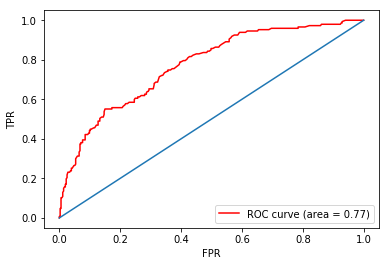

In [97]:
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [98]:
roc_auc

0.7716752423348944

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [99]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []
precision = []
recall = []
f1 = []

In [100]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1.append(f1_score(y_pred, y_test))

In [101]:
accuracy = np.array(accuracy)
precision = np.array(precision)
recall = np.array(recall)
f1 = np.array(f1)

result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
result["RF Bootstrap" + ' (Mean Score) '] = [accuracy.mean(), 
                          recall.mean(),
                          precision.mean(),
                          f1.mean()]
result['RF Bootstrap' + ' (Std Deviation)'] = [accuracy.std(), 
                          recall.std(),
                          precision.std(),
                          f1.std()]

result

,RF Bootstrap (Mean Score),RF Bootstrap (Std Deviation)
Accuracy,0.750200,0.009357
Recall,0.650870,0.034783
Precision,0.328571,0.045841
F1 Score,0.434355,0.039149
